In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data=pd.read_csv("Fertilizer Prediction.csv")
data.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [3]:
data.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [4]:
data.shape

(99, 9)

In [5]:
data.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

<Axes: xlabel='Fertilizer Name', ylabel='count'>

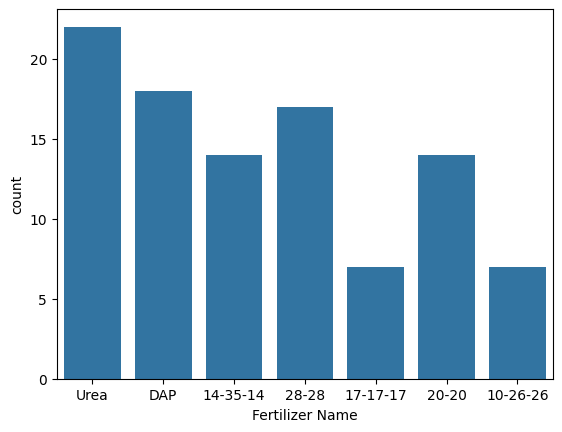

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data,x='Fertilizer Name')

In [7]:
data['Soil Type'].value_counts()

Soil Type
Loamy     21
Sandy     20
Clayey    20
Black     19
Red       19
Name: count, dtype: int64

In [8]:
data['Crop Type'].value_counts()

Crop Type
Sugarcane      13
Cotton         12
Millets        11
Paddy          10
Pulses         10
Wheat           9
Tobacco         7
Barley          7
Oil seeds       7
Ground Nuts     7
Maize           6
Name: count, dtype: int64

In [9]:
soil_dict={
    'Loamy':1,
    'Sandy':2,
    'Clayey':3,
    'Black':4,
    'Red':5
}

crop_dict={
    'Sugarcane':1,
    'Cotton':2,
    'Millets':3,
    'Paddy':4,
    'Pulses':5,
    'Wheat':6,
    'Tobacco':7,
    'Barley':8,
    'Oil seeds':9,
    'Ground Nuts':10,
    'Maize':11
    
}

In [10]:
data['Soil_Num']=data['Soil Type'].map(soil_dict)
data['Crop_Num']=data['Crop Type'].map(crop_dict)

In [11]:
data=data.drop(['Soil Type','Crop Type'],axis=1)
data.head()


,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Soil_Num,Crop_Num
0,26,52,38,37,0,0,Urea,2,11
1,29,52,45,12,0,36,DAP,1,1
2,34,65,62,7,9,30,14-35-14,4,2
3,32,62,34,22,0,20,28-28,5,7
4,28,54,46,35,0,0,Urea,3,4


In [12]:
X=data.drop(['Fertilizer Name'],axis=1)
Y=data['Fertilizer Name']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [14]:
X_train.shape

(79, 8)

In [15]:
X_test.shape

(20, 8)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    'Random Forest': RandomForestClassifier(),
}

for name,md in models.items():
    md.fit(X_train,Y_train)
    ypred=md.predict(X_test)
    
    print(f"the Accuracy of {name} is ",accuracy_score(Y_test,ypred))

the Accuracy of Random Forest is  1.0


In [18]:
classifier=RandomForestClassifier()
classifier.fit(X_train,Y_train)
ypred=classifier.predict(X_test)
accuracy_score(Y_test,ypred)

0.9

In [19]:
def recommendation(Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil_Num,Crop_Num):
    features = np.array([[Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil_Num,Crop_Num]])
    prediction = classifier.predict(features).reshape(1,-1)
    
    return prediction[0] 

In [20]:
Temparature=2
Humidity=59
Moisture=3
Nitrogen=12
Potassium=0
Phosphorous=3
Soil_Num=2
Crop_Num=11
predict=recommendation(Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil_Num,Crop_Num)
predict[0]

c:\Users\saidi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'Urea'

In [21]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("Fertclassifier.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()